# **Webscraping com Beatiful Soup**

LiveCoding Lets's Data: https://www.youtube.com/watch?v=aNtzKGTujuA&t=110s

- Buscar página de salários na Glassdoor
- Entender a estrutura do HTML da página com browser (Chrome-like)
- Utilizar o requests para extrair o HTML
- Utilzar o Beatiful Soup para extrair as estruturas e informações de salários
- Criar um DataFrame pandas e fazer uma análise descritiva básica



## Bibliotecas e imports

In [6]:
import requests 
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Request

In [30]:
headers = {'user-agent': 'Mozilla/5.0'} # criando um cabeçalho para fazer um request de um brownser e não ser identificado como um robô

resposta = requests.get('https://www.glassdoor.com.br/Sal%C3%A1rios/analista-de-dados-sal%C3%A1rio-SRCH_KO0,17.htm',
                        headers = headers) # fazendo a requisição para trazer os dados html

In [31]:

resposta.text # trazer os dados em formato de texto para verificar o que foi puxado da página

'<!DOCTYPE html><html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" style="height: 100%;" lang="pt" ><head><link href="/salaries/static/gd-salary-srch.bundle.css?v=987582da9e0652eee603" rel="stylesheet" media="all"/><meta  charset="utf-8"/><meta  name="referrer" content="origin"/><meta  name="theme-color" content="#0caa41"/><meta  name="msapplication-navbutton-color" content="#0caa41"/><meta  name="apple-mobile-web-app-capable" content="yes"/><meta  name="apple-mobile-web-app-status-bar-style" content="#0caa41"/><meta  http-equiv="Cache-Control" content="no-cache,must-revalidate"/><meta  http-equiv="Pragma" content="no-cache"/><meta  http-equiv="Expires" content="0"/><meta  name="viewport" content="width=device-width, initial-scale=1.0"/><link  rel="manifest" href="/manifest.json"/><link  rel="shortcut icon" href="/favicon.ico" type="image/vnd.microsoft.icon"/><link  rel="icon" href="/favicon.ico" type="image/x-icon"/><link  rel="preconnect" href=

In [32]:
resposta  # validando a resposta 

<Response [200]>

In [33]:
sopao_macarronico = resposta.text # gravando o texto em uma variável

## Estruturando com Beautiful Soup

In [34]:
sopa_bonita = BeautifulSoup(sopao_macarronico, 'html.parser') # transformando o texto da resposta em dados  mais estruturado
sopa_bonita

<!DOCTYPE html>
<html lang="pt" style="height: 100%;" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/"><head><link href="/salaries/static/gd-salary-srch.bundle.css?v=987582da9e0652eee603" media="all" rel="stylesheet"/><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="#0caa41" name="theme-color"/><meta content="#0caa41" name="msapplication-navbutton-color"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="#0caa41" name="apple-mobile-web-app-status-bar-style"/><meta content="no-cache,must-revalidate" http-equiv="Cache-Control"/><meta content="no-cache" http-equiv="Pragma"/><meta content="0" http-equiv="Expires"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><link href="/manifest.json" rel="manifest"/><link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/><link href="/favicon.ico" rel="icon" type="image/x-icon"/><link crossorigin="true" href="https://font

In [119]:
lista_empresas = sopa_bonita.find_all('h3',{'data-test':re.compile('salaries-list-item-.*-employer-name')}) #encontrar todos os H3 onde temos a chave e o valor especificado m expressão regular .*
lista_empresas

[<h3 class="m-0 css-g261rn" data-test="salaries-list-item-0-employer-name"><style data-emotion-css="f3vw95">.css-f3vw95{cursor:pointer;font-size:15px;line-height:24px;color:#1861bf;font-size:inherit;}.css-f3vw95:hover{color:#0c4085;}</style><a class="css-f3vw95 e1aj7ssy3" href="/Salário/Stone-Analista-De-Dados-Salários-E1093539_D_KO6,23.htm?filter.payPeriod=MONTHLY">Stone</a></h3>,
 <h3 class="m-0 css-g261rn" data-test="salaries-list-item-1-employer-name"><a class="css-f3vw95 e1aj7ssy3" href="/Salário/Itaú-Unibanco-Itaú-BBA-e-Rede-Analista-De-Dados-Salários-E10999_D_KO30,47.htm?filter.payPeriod=MONTHLY">Itaú Unibanco (Itaú BBA e Rede)</a></h3>,
 <h3 class="m-0 css-g261rn" data-test="salaries-list-item-2-employer-name"><a class="css-f3vw95 e1aj7ssy3" href="/Salário/Accenture-Analista-De-Dados-Salários-E4138_D_KO10,27.htm?filter.payPeriod=MONTHLY">Accenture</a></h3>,
 <h3 class="m-0 css-g261rn" data-test="salaries-list-item-3-employer-name"><a class="css-f3vw95 e1aj7ssy3" href="/Salário/

In [70]:
len(lista_empresas) #contar quantos elementos temos na lista

20

In [71]:
h3 = lista_empresas[0] # localizar o primeiro elemento da lista de h3 e associar a variável h3 apenas para entender os dados de um elemento
h3

<h3 class="m-0 css-g261rn" data-test="salaries-list-item-0-employer-name"><style data-emotion-css="f3vw95">.css-f3vw95{cursor:pointer;font-size:15px;line-height:24px;color:#1861bf;font-size:inherit;}.css-f3vw95:hover{color:#0c4085;}</style><a class="css-f3vw95 e1aj7ssy3" href="/Salário/Stone-Analista-De-Dados-Salários-E1093539_D_KO6,23.htm?filter.payPeriod=MONTHLY">Stone</a></h3>

In [72]:
a = h3.contents[1] # selecionar a segunda posição filho com o método contents e associar a variável a
a

<a class="css-f3vw95 e1aj7ssy3" href="/Salário/Stone-Analista-De-Dados-Salários-E1093539_D_KO6,23.htm?filter.payPeriod=MONTHLY">Stone</a>

In [73]:
a.text #selecionar o texto dentro do a>

'Stone'

In [74]:
h3.find('a').text # também é possível localizar o texto usando o métod find.

'Stone'

In [75]:
for empresa in lista_empresas:
  nome_empresa = empresa.find('a').text
  print(nome_empresa) # fazendo um for separadamente para pegar os dados dos nomes das empresas.

Stone
Itaú Unibanco (Itaú BBA e Rede)
Accenture
Lojas Renner
americanas s.a.
AUTOGLASS (Brazil)
Unimed
IBM
QuintoAndar
Atento (Brazil)
Atento
L'Oréal
Sercom Contact Center
ASAAS
Santander
Olist
TOTVS
Ambev Tech
PicPay
Sicredi


In [76]:
lista_salarios = sopa_bonita.find_all('div',{'data-test':re.compile('salaries-list-item-.*-salary-info')})
lista_salarios

[<div class="d-flex align-items-baseline" data-test="salaries-list-item-0-salary-info"><h3 class="m-0 css-g261rn">R$ 5.713</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-1-salary-info"><h3 class="m-0 css-g261rn">R$ 6.988</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-2-salary-info"><h3 class="m-0 css-g261rn">R$ 4.500</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-3-salary-info"><h3 class="m-0 css-g261rn">R$ 6.925</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-4-salary-info"><h3 class="m-0 css-g261rn">R$ 6.561</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-5-s

In [77]:
div_salario = lista_salarios[0].contents
lista_salarios

[<div class="d-flex align-items-baseline" data-test="salaries-list-item-0-salary-info"><h3 class="m-0 css-g261rn">R$ 5.713</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-1-salary-info"><h3 class="m-0 css-g261rn">R$ 6.988</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-2-salary-info"><h3 class="m-0 css-g261rn">R$ 4.500</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-3-salary-info"><h3 class="m-0 css-g261rn">R$ 6.925</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-4-salary-info"><h3 class="m-0 css-g261rn">R$ 6.561</h3><span class="m-0 css-18stkbk"> /<!-- -->mês</span></div>,
 <div class="d-flex align-items-baseline" data-test="salaries-list-item-5-s

In [78]:
h3_salario = div_salario[0]
h3_salario

<h3 class="m-0 css-g261rn">R$ 5.713</h3>

In [79]:
salario = h3_salario.text
salario

'R$\xa05.713'

In [80]:
salario.replace('R$','').replace('\xa0','').replace('.','')

'5713'

In [81]:
for salario in lista_salarios:
  str_salarios = salario.contents[0].text
  str_salarios = str_salarios.replace('R$','').replace('\xa0','').replace('.','')
  print(str_salarios) #fazendo um for para pegar os valores dos salários


5713
6988
4500
6925
6561
4000
4200
5191
7423
2487
4909
6786
1439
7553
6867
5537
4500
5003
8171
4926


In [88]:
lista_todos_salarios = []
for empresa,salario in zip(lista_empresas,lista_salarios):
  nome_empresa = empresa.find('a').text
  str_salarios = salario.contents[0].text
  str_salarios = str_salarios.replace('R$','').replace('\xa0','').replace('.','')
  lista_todos_salarios.append((nome_empresa,str_salarios))
  
lista_todos_salarios

[('Stone', '5713'),
 ('Itaú Unibanco (Itaú BBA e Rede)', '6988'),
 ('Accenture', '4500'),
 ('Lojas Renner', '6925'),
 ('americanas s.a.', '6561'),
 ('AUTOGLASS (Brazil)', '4000'),
 ('Unimed', '4200'),
 ('IBM', '5191'),
 ('QuintoAndar', '7423'),
 ('Atento (Brazil)', '2487'),
 ('Atento', '4909'),
 ("L'Oréal", '6786'),
 ('Sercom Contact Center', '1439'),
 ('ASAAS', '7553'),
 ('Santander', '6867'),
 ('Olist', '5537'),
 ('TOTVS', '4500'),
 ('Ambev Tech', '5003'),
 ('PicPay', '8171'),
 ('Sicredi', '4926')]

## Criando um DataFrame com os dados

In [89]:
df = pd.DataFrame(lista_todos_salarios,columns=['Empresa','Salário'])

In [107]:
df = df.sort_values(by=['Salário'],ascending=False).reset_index(drop=True)

In [108]:
df

,Empresa,Salário
0,PicPay,8171.0
1,ASAAS,7553.0
2,QuintoAndar,7423.0
3,Itaú Unibanco (Itaú BBA e Rede),6988.0
4,Lojas Renner,6925.0
5,Santander,6867.0
6,L'Oréal,6786.0
7,americanas s.a.,6561.0
8,Stone,5713.0
9,Olist,5537.0


In [91]:
df.dtypes

Empresa    object
Salário    object
dtype: object

In [92]:
df['Salário'] = df['Salário'].astype(np.float32)
df.dtypes

Empresa     object
Salário    float32
dtype: object

## Descrevendo os dados

In [93]:
df.describe()

,Salário
count,20.000000
mean,5483.950195
std,1724.630859
min,1439.000000
25%,4500.000000
50%,5364.000000
75%,6881.500000
max,8171.000000


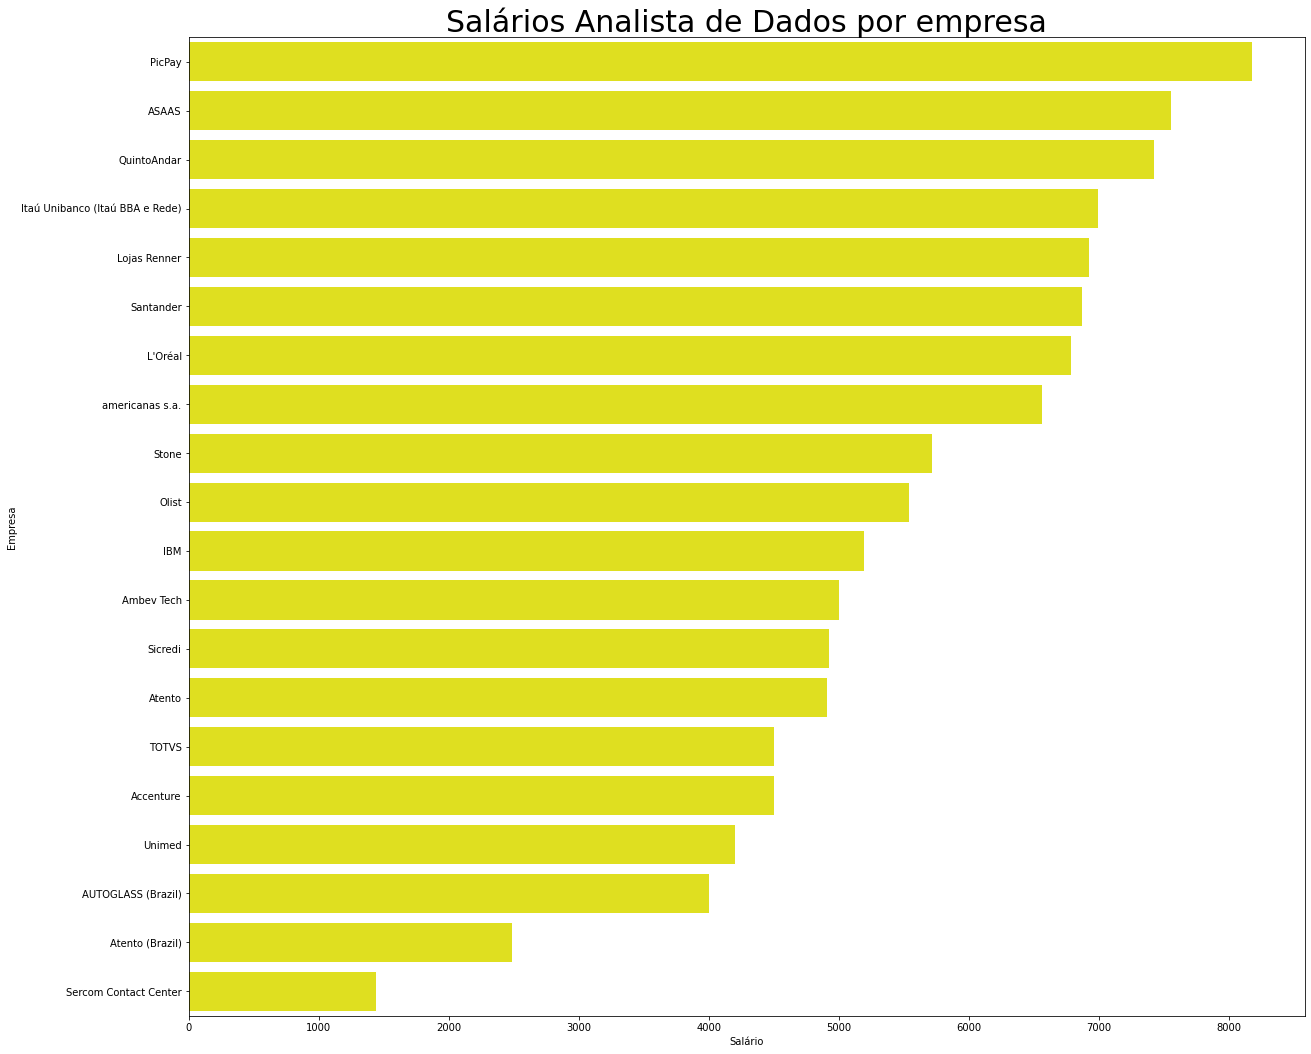

In [120]:
plt.figure(figsize=(20,18))
sns.barplot(data=df,x='Salário',y='Empresa',color = 'yellow').set_title('Salários Analista de Dados por empresa',fontdict = { 'fontsize': 30})
plt.show()